In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps
from torchvision.transforms import v2
from torch.utils.data import DataLoader, Dataset

In [5]:
import os 

ungsung_path = os.listdir('./ungsung_dataset/ungsung')
current = 527
for path in ungsung_path:
    if path[0] == 'K':
        path_format = f"ungsung{current}.jpeg"
        old_path = os.path.join('./ungsung_dataset', path)
        new_path = os.path.join('./ungsung_dataset', path_format)
        os.rename(old_path, new_path)
        current += 1

In [6]:
for i in range(1, 5):
    image_path = f"./ungsung_dataset/ungsung/ungsung{i}.jpeg"
    image = Image.open(image_path)
    print(image.size)

(1536, 2048)
(1536, 2048)
(1536, 2048)
(1536, 2048)


In [8]:
def visualize(image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

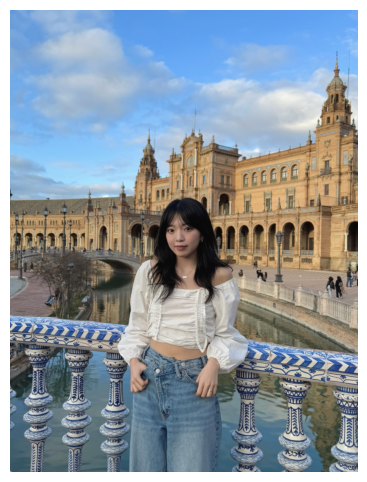

(1539, 2048)


In [24]:
temper = v2.Resize(size=(2048, 1539))
for i in range(16, 17):
    image_path = f"./ungsung_dataset/ungsung/ungsung{i}.jpeg"
    image = Image.open(image_path)
    image = ImageOps.exif_transpose(image)
    # if image.size != (1536, 2048):
    #     image = transformer(image)
    #     print('YES', i)
    #     visualize(image)
    # else: 
    #     visualize(image)
    #     pass
    image = temper(image)
    visualize(image)

In [13]:
transformer = v2.Compose(
    [
        v2.CenterCrop(size=(1000, 2000)),
        v2.ToImage(),
        v2.ToDtype(dtype=torch.float32, scale=True),
    ]
)

image = transformer(image)
image.size()

torch.Size([3, 1000, 2000])

In [16]:
not_path = os.listdir('./ungsung_dataset/not')
current = 1
for path in not_path:
    path_format = f"not{current}.jpeg"
    old_path = os.path.join('./ungsung_dataset/not', path)
    new_path = os.path.join('./ungsung_dataset/not', path_format)
    os.rename(old_path, new_path)
    current += 1
